# Student Name: Huynh Truong Tu
 Below is my assignment for week 4's "Binary classification of iris"


------------------------------------------------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk

In [8]:
init_data = pd.read_csv('./houseprice_train.csv')
display(init_data.head())
display(init_data.tail())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


## Problem 1 - Feature selection for practice

In [11]:
house_price = init_data[['GrLivArea','YearBuilt','SalePrice']]
display(house_price.describe())
display(house_price.info())
display('Any Null value?',house_price.isnull().sum().all())

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
 2   SalePrice  1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


None

'Any Null value?'

False

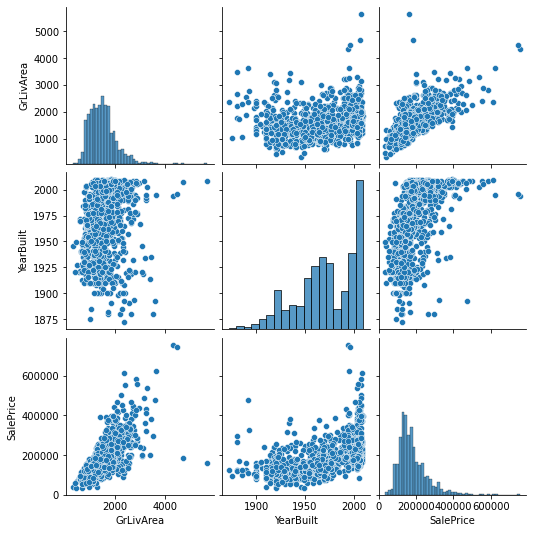

In [12]:
sns.pairplot(data = house_price)

## Problem 2 - Estimation and evaluation by linear regression

### Data Standardization and Separation

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = house_price[['GrLivArea','YearBuilt']]
Y = house_price[['SalePrice']]
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y).reshape((Y.shape[0],))
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
display(f'Train,Test shapes: Train:{x_train.shape,y_train.shape}, Test:{x_test.shape,y_test.shape}')

'Train,Test shapes: Train:((1168, 2), (1168,)), Test:((292, 2), (292,))'

### Regression

In [14]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
cls = LinearRegression()
cls.fit(x_train,y_train)
predictions = cls.predict(x_test)
display('Mean square Error:',mean_squared_error(y_test,predictions))

'Mean square Error:'

0.33647980973913716

### Visualizing Predition Result

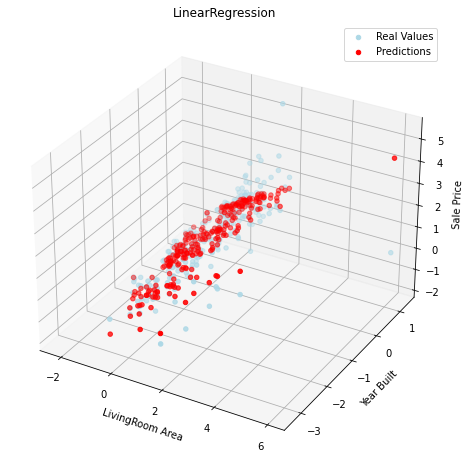

In [15]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(projection='3d')
ax.set_title('LinearRegression')
ax.scatter(x_test[:,0],x_test[:,1],y_test,c = 'lightblue')
ax.scatter(x_test[:,0],x_test[:,1],predictions,c = 'red')
ax.legend(['Real Values', 'Predictions'])
ax.set_xlabel('LivingRoom Area')
ax.set_ylabel('Year Built')
ax.set_zlabel('Sale Price')
plt.show()

### Problem 3 - Comparison of methods

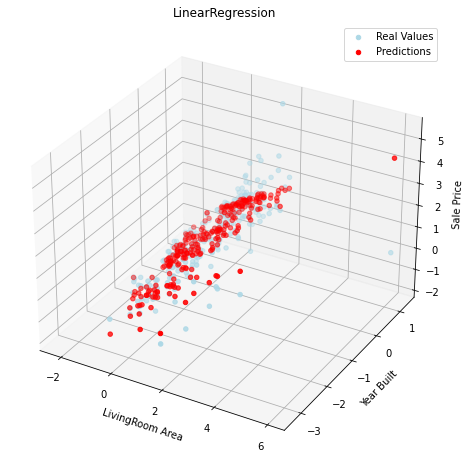

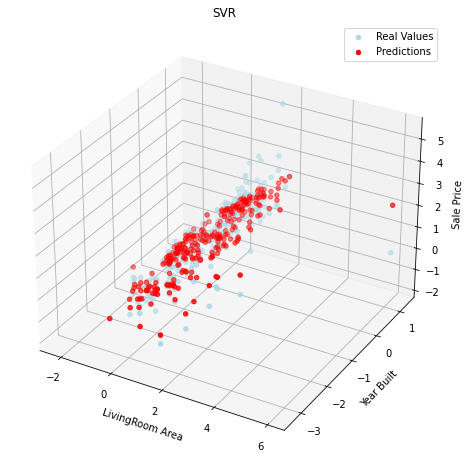

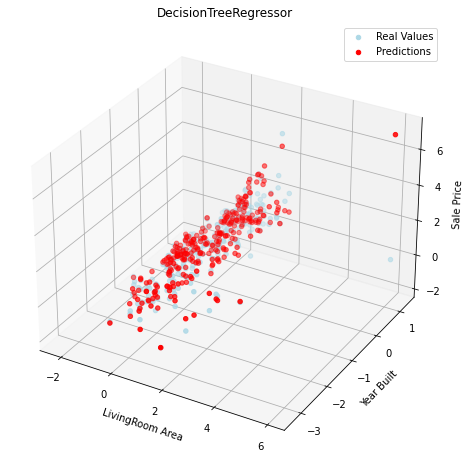

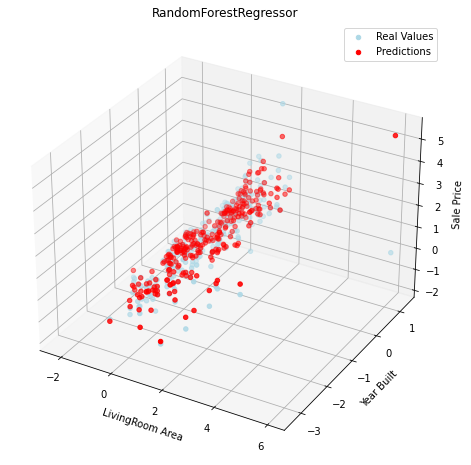

,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
MSE,0.33648,0.267363,0.530693,0.333787


In [16]:
def plot_prediction(xtest,ytest,pred, methodname):
    fig = plt.figure(figsize=[8,8])
    ax = fig.add_subplot(projection='3d')
    ax.set_title(methodname)
    ax.scatter(xtest[:,0],xtest[:,1],ytest,c = 'lightblue')
    ax.scatter(xtest[:,0],xtest[:,1],pred,c = 'red')
    ax.legend(['Real Values', 'Predictions'])
    ax.set_xlabel('LivingRoom Area')
    ax.set_ylabel('Year Built')
    ax.set_zlabel('Sale Price')
    plt.show()

def test_plot_summary(cls, train,test,plot = True):
    x_train,y_train = train
    x_test,y_test = test
    cls.fit(x_train,y_train)
    prediction = cls.predict(x_test)

    method_name = cls.__class__.__name__
    if plot: plot_prediction(x_test,y_test,prediction,method_name)
    return pd.DataFrame(columns=[method_name], index= ['MSE'], data=[[mean_squared_error(y_test,prediction)]])

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

train = x_train,y_train
test = x_test,y_test
summary = pd.DataFrame()
for cls in [LinearRegression(),SVR(), DecisionTreeRegressor(), RandomForestRegressor()]:
    summary = pd.concat([summary,test_plot_summary(cls, train,test)],axis = 1)
display(summary)

Conclusion: seem like **SVR** is performing better than most

## Problem 4 - Learning using other features

In [17]:
init_data.corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

> I'll add TotalBsmtSF and OverallQual to our model since these attributes have quite hight positive correlation.

In [18]:
more_house_price = init_data[['GrLivArea','YearBuilt','TotalBsmtSF','OverallQual','SalePrice']]
more_house_price.head()

,GrLivArea,YearBuilt,TotalBsmtSF,OverallQual,SalePrice
0,1710,2003,856,7,208500
1,1262,1976,1262,6,181500
2,1786,2001,920,7,223500
3,1717,1915,756,7,140000
4,2198,2000,1145,8,250000


> Start splitting and training

In [19]:
X = more_house_price[['GrLivArea','YearBuilt','TotalBsmtSF','OverallQual']]
Y = more_house_price[['SalePrice']]
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y).reshape((Y.shape[0],))
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
display(f'Train,Test shapes: Train:{x_train.shape,y_train.shape}, Test:{x_test.shape,y_test.shape}')

'Train,Test shapes: Train:((1168, 4), (1168,)), Test:((292, 4), (292,))'

> Then test 

In [20]:
train = x_train,y_train
test = x_test,y_test
summary2 = pd.DataFrame()
for cls in [LinearRegression(),SVR(), DecisionTreeRegressor(), RandomForestRegressor()]:
    summary2 = pd.concat([summary2,test_plot_summary(cls, train,test,plot = False)],axis = 1)
display(summary2)

,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
MSE,0.355932,0.202616,0.227867,0.154367


> Comparation:

In [21]:
display('Old:', summary,'New: ',summary2)

'Old:'

,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
MSE,0.33648,0.267363,0.530693,0.333787


'New: '

,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
MSE,0.355932,0.202616,0.227867,0.154367


### Conclusion

I have tried and rerun these models many times, each time the results are different but with the trend that the "New" model are performing better most of the time. Especially **SVR**

-----------------------------------------------------------------------

This is the end of my assignment, thank you for reading!